# X To A Boxplots

In [293]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory
from larval_gonad.cell_selection import SOMA, EARLY_GERM, LATE_GERM
from larval_gonad.x_to_a import multi_chrom_boxplot, commonly_expressed, CHROMS_CHR

# Setup notebook
nbconfig = Nb.setup_notebook(subproject_dir='../output/paper_submission', 
                             seurat_dir='../output/combined_testis_force', 
                             formats=['pdf', ], styles=['notebook', 'paper'])

last updated: 2018-05-03 
Git hash: b06784b4f25bb9f06dc5724b481bff901104b4da


In [2]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

## X To A Analysis (commonly expressed)

In [276]:
expressed = commonly_expressed(norm)
dat = norm.T.join(clusters['res.0.4'])
dat.rename({'res.0.4': 'cluster'}, inplace=True, axis=1)

In [277]:
annot = {
    0: 'Late Primary Spermatocytes (0)',
    1: 'Early Somatic Cyst Cells (1)',
    2: 'Late Somatic Cyst Cells (2)',
    3: 'Late Somatic Cyst Cells (3)',
    4: 'Spermatogonia (4)',
    5: 'Terminal Epithelium (5)',
    6: 'Mid Primary Spermatocytes (6)',
    7: 'Late Somatic Cyst Cells (7)',
    8: 'Early Primary Spermatocytes (8)',
    9: 'Pigment Cells (9)',
    10: 'Early Somatic Cyst Cells (10)',
    11: 'Mid Primary Spermatocytes (11)',
}

In [287]:
_order = [
    'Spermatogonia (4)',
    'Early Primary Spermatocytes (8)',
    'Mid Primary Spermatocytes (6)',
    'Mid Primary Spermatocytes (11)',
    'Late Primary Spermatocytes (0)',
    'Early Somatic Cyst Cells (1)',
    'Early Somatic Cyst Cells (10)',
    'Late Somatic Cyst Cells (2)',
    'Late Somatic Cyst Cells (3)',
    'Late Somatic Cyst Cells (7)',
    'Terminal Epithelium (5)',
    'Pigment Cells (9)',
]

In [278]:
dat.head()

,FBgn0031081,FBgn0031085,FBgn0040784,FBgn0031086,FBgn0031082,FBgn0031080,FBgn0053217,FBgn0052350,FBgn0024733,FBgn0040372,...,FBgn0001174,FBgn0053128,FBgn0051926,FBgn0051661,FBgn0028481,FBgn0031306,FBgn0031305,FBgn0031276,FBgn0040725,cluster
rep1_AAACCTGAGACAAGCC,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,2.650884,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
rep1_AAACCTGAGCTTATCG,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,4.120760,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
rep1_AAACCTGGTGTAATGA,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,3.068649,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
rep1_AAACCTGGTTCATGGT,0.0,1.42685,1.748911,0.0,0.0,0.0,0.0,0.0,1.426850,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
rep1_AAACCTGTCCCTCTTT,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,2.870109,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [279]:
dat.cluster = dat.cluster.apply(lambda x: annot[x])

In [318]:
dat2 = dat.groupby('cluster').median().T.join(nbconfig.fbgn2chrom)

In [281]:
dat2_exp = dat2.loc[expressed]

In [282]:
ribo = []
for k, v in nbconfig.fbgn2symbol.items():
    if v.startswith('Rp') and k in dat2.index:
        ribo.append(k)

In [319]:
dat2_ribo = dat2.loc[ribo]

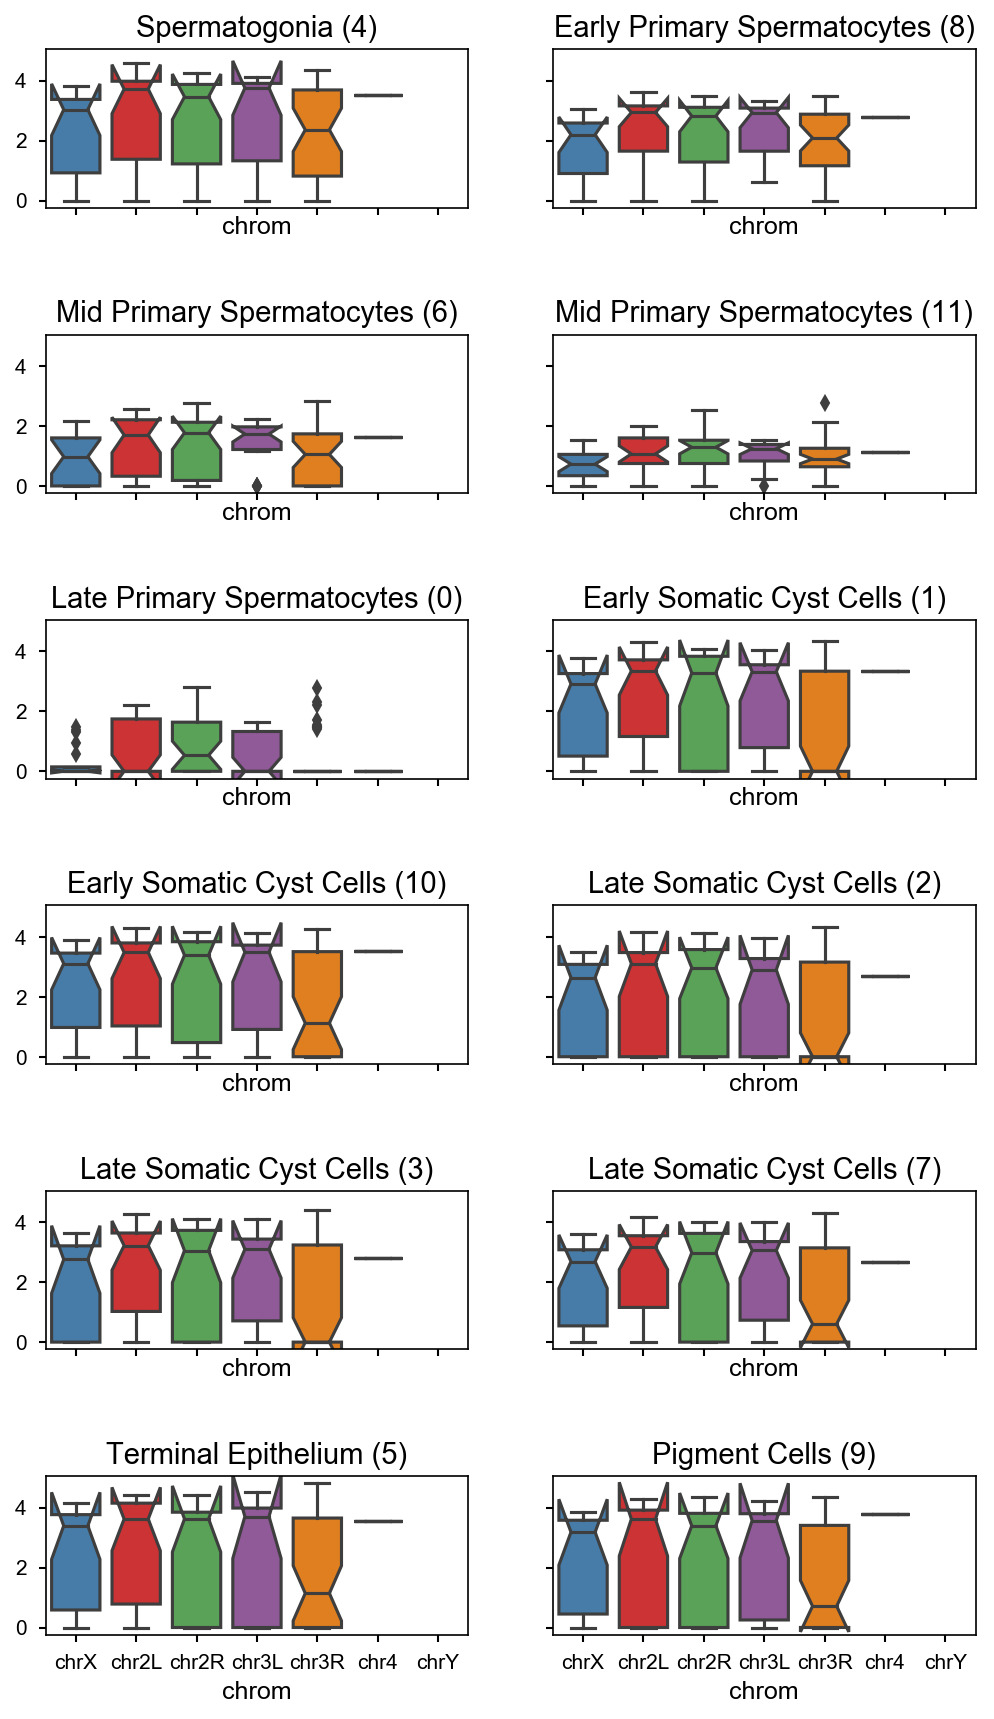

In [320]:
fig, axes = plt.subplots(6, 2, figsize=(8, 14), sharex='all', sharey='all', gridspec_kw={'hspace': 0.8})
axes = axes.flatten()
for i, clus in enumerate(_order):
    ax = axes[i]
    sns.boxplot(
        x='chrom', 
        y=clus, 
        data=dat2_ribo.query('chrom != "chrM"'), 
        notch=True, 
        order=CHROMS_CHR,
        ax=ax
    )
    ax.set_title(clus)
    ax.set_ylabel('')

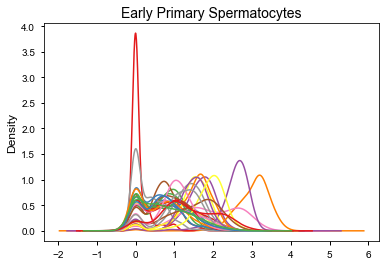

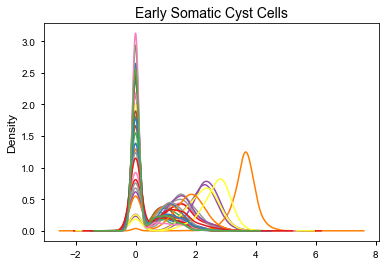

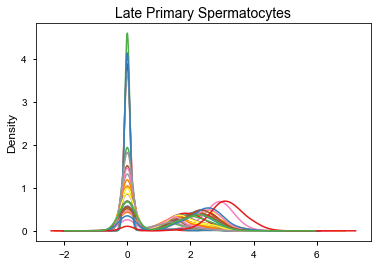

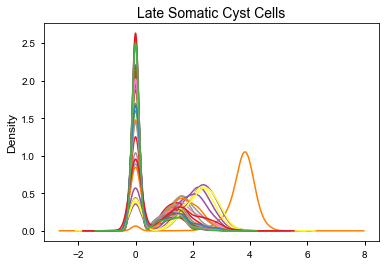

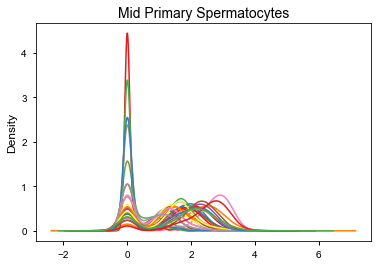

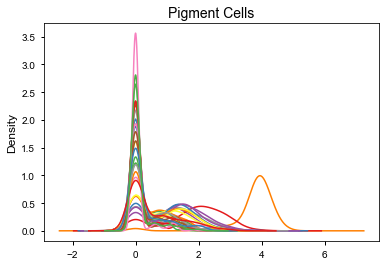

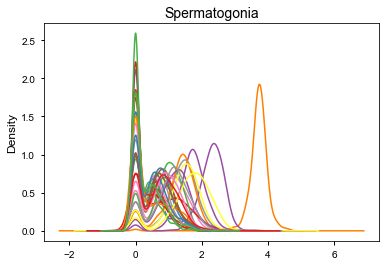

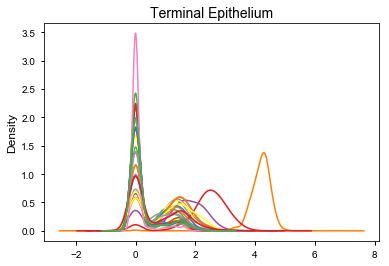

In [269]:
for g, dd in dat.groupby('cluster'):
    ax = dd.loc[:, expressed[-30:]].plot(kind='kde', legend=False)
    ax.set_title(g)

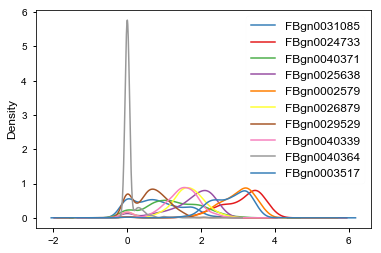

In [27]:
def strip_chr(ax):
    labels = ax.get_xticklabels()
    new = []
    for l in labels:
        new.append(l.get_text().strip('chr'))
        
    ax.set_xticklabels(new)

In [28]:
def plot_cluster_x2a(df, fbgns, cluster_id, name):
    idx = dat.query(f'cluster == {cluster_id}').index
    dat.drop('cluster', axis=1)
    data = dat.loc[idx, fbgns].median().to_frame().join(nbconfig.fbgn2chrom).query('chrom != "chrY"')
    data.columns = ['Normalized Expression', 'Chromosome']
    _tsne = tsne.copy()
    _tsne['on'] = 0
    _tsne.loc[idx, 'on'] = 1
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2), facecolor='w')
    
    TSNEPlot(data=_tsne, hue='on', cmap={0: greys[1], 1: colors[cluster_id]}, ax=ax1, s=60, linewidth=.1)
    
    multi_chrom_boxplot('Chromosome', 'Normalized Expression', data=data, flierprops={'alpha': .6}, notch=True, 
                        palette=boxplot_colors, use_text=False, multiplier=(1.2, .5), ax=ax2, zorder=2)
    
    ax1.legend_.remove()
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    
    ax2.set_ylim(None, 6.5);
    ax2.set_xlabel('')
    strip_chr(ax2)
    
    plt.suptitle(name)

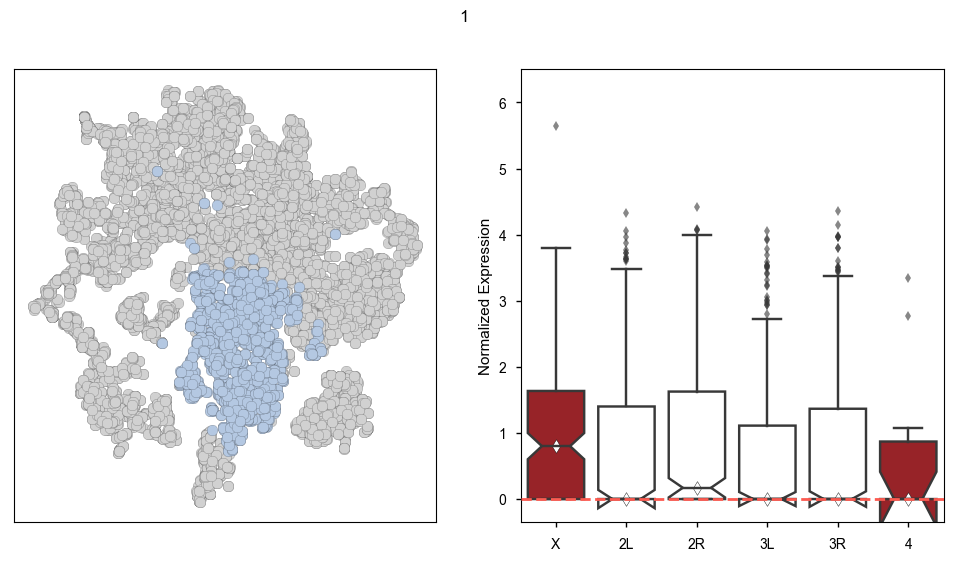

In [50]:
plot_cluster_x2a(dat, expressed, 1, '1')